In [6]:
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!wget https://github.com/Dinesh-Adhithya-H/Foundations-of-Sports-Analytics-Data-Representation-and-Models-in-Sports/blob/main/DATA/IPL2018teams.xlsx?raw=true

--2021-06-24 07:58:55--  https://github.com/Dinesh-Adhithya-H/Foundations-of-Sports-Analytics-Data-Representation-and-Models-in-Sports/blob/main/DATA/IPL2018teams.xlsx?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/Foundations-of-Sports-Analytics-Data-Representation-and-Models-in-Sports/raw/main/DATA/IPL2018teams.xlsx [following]
--2021-06-24 07:58:55--  https://github.com/Dinesh-Adhithya-H/Foundations-of-Sports-Analytics-Data-Representation-and-Models-in-Sports/raw/main/DATA/IPL2018teams.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Foundations-of-Sports-Analytics-Data-Representation-and-Models-in-Sports/main/DATA/IPL2018teams.xlsx [following]
--2021-06-24 07:58:55--  https://raw.githubuse

In [4]:
data=pd.read_excel("IPL2018teams.xlsx?raw=true")

In [5]:
data

,scorecard_id,start_date,phase,name,home_team,away_team,toss_winner,toss_decision,inn1team,innings1,wickets1,overs1,closure1,innings2,wickets2,overs2,closure2,adjusted_target_indicator,adjusted_target,team1_overs,team2_overs,mom_player_id,mom_player,scoring_status,result_type,result_margin,winning_team
0,1056637,2018-04-07,NaN,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,Chennai Super Kings,f,Mumbai Indians,165,4,20.0,c,169,9,19.5,e,n,0,20.0,20,44613,DJ Bravo,live bbb,ww,1,Chennai Super Kings
1,1056638,2018-04-08,NaN,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,f,Delhi Daredevils,166,7,20.0,c,167,4,18.5,e,n,0,20.0,20,170187,KL Rahul,live bbb,ww,6,Kings XI Punjab
2,1056639,2018-04-08,NaN,"Eden Gardens, Kolkata",Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,f,Royal Challengers Bangalore,176,7,20.0,c,177,6,18.5,e,n,0,20.0,20,412485,N Rana,live bbb,ww,4,Kolkata Knight Riders
3,1056640,2018-04-09,NaN,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers,Rajasthan Royals,Sunrisers,f,Rajasthan Royals,125,9,20.0,c,127,1,15.5,e,n,0,20.0,20,15627,S Dhawan,live bbb,ww,9,Sunrisers
4,1056641,2018-04-10,NaN,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,f,Kolkata Knight Riders,202,6,20.0,c,205,5,19.5,e,n,0,20.0,20,119895,SW Billings,live bbb,ww,5,Chennai Super Kings
5,1056642,2018-04-11,NaN,"Sawai Mansingh Stadium, Jaipur",Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,f,Rajasthan Royals,153,5,17.5,c,60,4,6.0,c,y,71,17.5,6,218180,SV Samson,live bbb,wr,10,Rajasthan Royals
6,1056643,2018-04-12,NaN,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers,Mumbai Indians,Sunrisers,f,Mumbai Indians,147,8,20.0,c,151,9,20.0,c,n,0,20.0,20,1738090,Rashid Khan,live bbb,ww,1,Sunrisers
7,1056644,2018-04-13,NaN,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,f,Kings XI Punjab,155,10,19.2,a,159,6,19.3,e,n,0,20.0,20,356989,UT Yadav,live bbb,ww,4,Royal Challengers Bangalore
8,1056645,2018-04-14,NaN,"Wankhede Stadium, Mumbai",Mumbai Indians,Delhi Daredevils,Delhi Daredevils,f,Mumbai Indians,194,7,20.0,c,195,3,20.0,c,n,0,20.0,20,157435,JJ Roy,live bbb,ww,7,Delhi Daredevils
9,1056646,2018-04-14,NaN,"Eden Gardens, Kolkata",Kolkata Knight Riders,Sunrisers,Sunrisers,f,Kolkata Knight Riders,138,8,20.0,c,139,5,19.0,e,n,0,20.0,20,1073273,B Stanlake,live bbb,ww,5,Sunrisers


In [8]:
data.columns

Index(['scorecard_id', 'start_date', 'phase', 'name', 'home_team', 'away_team',
       'toss_winner', 'toss_decision', 'inn1team', 'innings1', 'wickets1',
       'overs1', 'closure1', 'innings2', 'wickets2', 'overs2', 'closure2',
       'adjusted_target_indicator', 'adjusted_target', 'team1_overs',
       'team2_overs', 'mom_player_id', 'mom_player', 'scoring_status',
       'result_type', 'result_margin', 'winning_team'],
      dtype='object')

In [10]:
data["home_win"]=np.where(data["home_team"]==data["winning_team"],1,0)
data["away_win"]=np.where(data["away_team"]==data["winning_team"],1,0)
data["home_runs"]=np.where(data["home_team"]==data["inn1team"],data["innings1"],data["innings2"])
data["away_runs"]=np.where(data["away_team"]==data["inn1team"],data["innings1"],data["innings2"])
data["count"]=1

In [13]:
data_away=data.groupby("away_team")["count","away_win","home_runs","away_runs"].sum()
data_home=data.groupby("home_team")["count","home_win","home_runs","away_runs"].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [14]:
data_home

,count,home_win,home_runs,away_runs
home_team,,,,
Chennai Super Kings,9,8,1577,1486
Delhi Daredevils,7,4,1258,1122
Kings XI Punjab,7,4,1188,1202
Kolkata Knight Riders,9,5,1468,1417
Mumbai Indians,7,3,1194,1171
Rajasthan Royals,7,5,1120,994
Royal Challengers Bangalore,7,4,1298,1286
Sunrisers,7,5,1070,1050


In [15]:
data_away

,count,away_win,home_runs,away_runs
away_team,,,,
Chennai Super Kings,7,3,1264,1232
Delhi Daredevils,7,1,1265,1085
Kings XI Punjab,7,2,1124,1022
Kolkata Knight Riders,7,4,1326,1291
Mumbai Indians,7,3,1111,1186
Rajasthan Royals,8,2,1362,1237
Royal Challengers Bangalore,7,2,1097,1024
Sunrisers,10,5,1624,1651


In [19]:
data1=pd.DataFrame()
data1['win']=data_home["home_win"]+data_away["away_win"]
data1['game']=data_home["count"]+data_away["count"]
data1['runs']=data_home["home_runs"]+data_away["away_runs"]
data1['runs_against']=data_home["away_runs"]+data_away["home_runs"]

In [20]:
data1["win/game"]=data1['win']/data1['game']
data1["pyth"]=data1["runs"]**2/(data1["runs"]**2 + data1["runs_against"]**2)

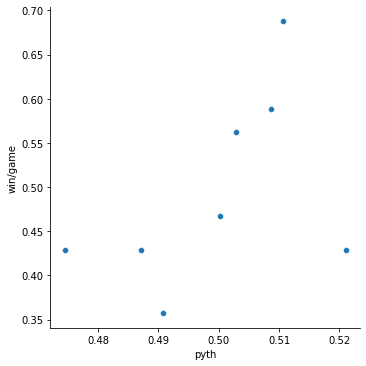

In [21]:
sns.relplot(x="pyth",y="win/game",data=data1)

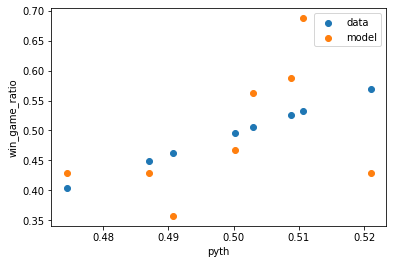

In [34]:
from sklearn.linear_model import LinearRegression
pyth=np.array(data1["pyth"]).reshape(-1,1)
win_game_ratio=np.array(data1["win/game"]).reshape(-1,1)
lr=LinearRegression()
lr.fit(pyth,win_game_ratio)
plt.scatter(pyth,lr.predict(pyth),label="data")
plt.scatter(pyth,win_game_ratio,label="model")
plt.xlabel("pyth")
plt.ylabel("win_game_ratio")
plt.legend()
plt.show()